## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
print(x_train.shape[0])
print(x_test.shape[0])
print(len(x_test))

60000
10000
10000


### Find dimensions of an image in the dataset

In [5]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_ytrain = np_utils.to_categorical(y_train)
print(dummy_ytrain)
dummy_ytest = np_utils.to_categorical(y_test)
print(dummy_ytest)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Normalize both the train and test image data from 0-255 to 0-1

In [7]:
x_trainN = x_train/ 255
x_testN = x_test/ 255
print(x_train[0])
print(x_trainN[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:

x_trainNR = x_trainN.reshape((60000, 28, 28,1))
x_testNR = x_testN.reshape((10000,28,28, 1))

### Import the necessary layers from keras to build the model

In [0]:
from keras.datasets import cifar10, mnist
from keras.models import Sequential# sequential is one type of model; there are graph models as well
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape # Dense is fully connected layer
from keras.layers import Convolution2D, MaxPooling2D #
from keras.utils import np_utils
import pickle # serialization fancy word for storing on disk
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [10]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10 

# Define the Type of Model
model2 = Sequential()
# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))# input shape is known in the previous layer. so we don't give input shape
model2.add(Activation('relu'))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))


# Layer 1
model2.add(Dense(output_dim=128, init='he_normal', bias=True))
model2.add(Activation("relu"))

# Layer 2
model2.add(Dense(output_dim=10, init='he_normal', bias=True))
model2.add(Activation("softmax"))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

# Train the model
model2.fit(x_trainNR, dummy_ytrain, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
        validation_data=(x_testNR, dummy_ytest), callbacks=callback_list, verbose=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, kernel_initializer="he_normal", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, kernel_initializer="he_normal", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.3738 - acc: 0.8643 - val_loss: 0.3034 - val_acc: 0.8876
Epoch 2/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.2371 - acc: 0.9116 - val_loss: 0.2548 - val_acc: 0.9085
Epoch 3/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.1778 - acc: 0.9336 - val_loss: 0.2480 - val_acc: 0.9114
Epoch 4/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.1293 - acc: 0.9522 - val_loss: 0.2579 - val_acc: 0.9154
Epoch 5/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0925 - acc: 0.9652 - val_loss: 0.2925 - val_acc: 0.9123
Epoch 6/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0664 - acc: 0.9752 - val_loss: 0.3742 - val_acc: 0.9144
Epoch 7/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0494 - acc: 0.9820 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [12]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10 

# Define the Type of Model
model3 = Sequential()
# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))# input shape is known in the previous layer. so we don't give input shape
model3.add(Activation('relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))
# Dropout
model3.add(Dropout(0.25)) #drop-out with p = 0.25

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))


# Layer 1
model3.add(Dense(output_dim=128, init='he_normal', bias=True))
model3.add(Activation("relu"))

# Layer 2
model3.add(Dense(output_dim=10, init='he_normal', bias=True))
model3.add(Activation("softmax"))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

# Train the model
model3.fit(x_trainNR, dummy_ytrain, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
  validation_data=(x_testNR, dummy_ytest), callbacks=callback_list, verbose=True)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, kernel_initializer="he_normal", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, kernel_initializer="he_normal", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.3980 - acc: 0.8551 - val_loss: 0.3262 - val_acc: 0.8809
Epoch 2/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.2602 - acc: 0.9051 - val_loss: 0.2551 - val_acc: 0.9065
Epoch 3/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.2112 - acc: 0.9216 - val_loss: 0.2511 - val_acc: 0.9102
Epoch 4/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.1797 - acc: 0.9333 - val_loss: 0.2354 - val_acc: 0.9167
Epoch 5/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.1568 - acc: 0.9400 - val_loss: 0.2313 - val_acc: 0.9184
Epoch 6/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.1357 - acc: 0.9484 - val_loss: 0.2436 - val_acc: 0.9168
Epoch 7/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.1164 - acc: 0.9562 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_trainNR)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

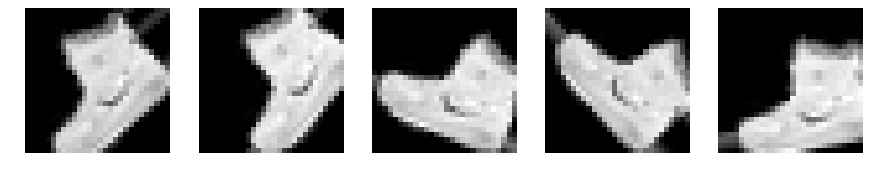

In [14]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_trainNR[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [21]:
H = model3.fit_generator(datagen.flow(x_trainNR, dummy_ytrain, batch_size=32),
	validation_data=(x_testNR, dummy_ytest), steps_per_epoch=len(x_trainNR) /32,
	epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7215 - acc: 0.7338 - val_loss: 0.3567 - val_acc: 0.8731
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5360 - acc: 0.8000 - val_loss: 0.3763 - val_acc: 0.8715
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4825 - acc: 0.8194 - val_loss: 0.3433 - val_acc: 0.8816
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4536 - acc: 0.8308 - val_loss: 0.3403 - val_acc: 0.8788
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4310 - acc: 0.8386 - val_loss: 0.3231 - val_acc: 0.8822
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4152 - acc: 0.8453 - val_loss: 0.3377 - val_acc: 0.8863
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4008 - acc: 0.8501 - val_loss: 0.3186 - val_acc: 0.8843
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [23]:
model3.evaluate(x_trainNR,dummy_ytrain)

60000/60000 [==============================] - 5s 84us/step


[0.255135875899593, 0.9075]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [24]:
from keras.datasets import cifar10
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()


170500096/170498071 [==============================] - 9s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train1)

### **Prepare/fit the generator.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


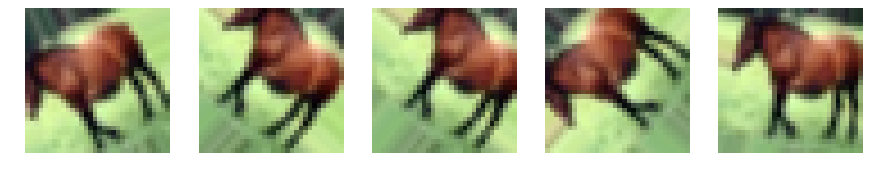

In [28]:
from matplotlib import pyplot as plt
from scipy.misc import toimage
gen = datagen.flow(x_train1[7:8], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(toimage(gen.next().squeeze()), cmap='gray')
    plt.plot()
plt.show()

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**